# Zero shot image classification

In [ ]:
import os
from transformers import pipeline
from PIL import Image
import time
import matplotlib.pyplot as plt

In [ ]:
# Transformers installation
! pip install transformers datasets
# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


## Zero-shot image classification pipeline

The simplest way to try out inference with a model supporting zero-shot image classification is to use the corresponding [pipeline()](https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.pipeline).
Instantiate a pipeline from a [checkpoint on the Hugging Face Hub](https://huggingface.co/models?pipeline_tag=zero-shot-image-classification&sort=downloads):

In [ ]:
from transformers import pipeline

checkpoint = "openai/clip-vit-large-patch14"
detector = pipeline(model=checkpoint, task="zero-shot-image-classification", device=0)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

In [ ]:
import zipfile
import os

zip_file_name = '/content/dataset.zip'

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
image_folder = '/content/dataset'
candidate_labels = ["students fighting", "students getting punished", "teacher using mobile", "teacher checking notebook"]



Time taken for 00004.png: 0.1898 seconds


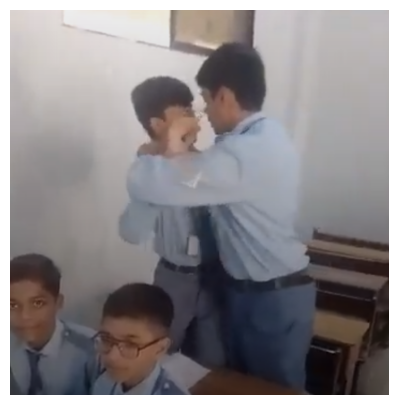

Predictions for 00004.png:
  - students getting punished: 0.6038
  - students fighting: 0.3954
  - teacher checking notebook: 0.0005
  - teacher using mobile: 0.0003


Time taken for 00003.png: 0.1240 seconds


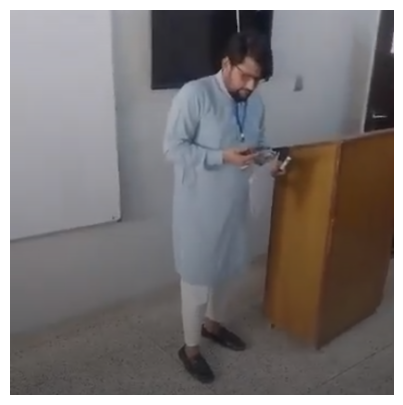

Predictions for 00003.png:
  - teacher using mobile: 0.9099
  - teacher checking notebook: 0.0900
  - students getting punished: 0.0002
  - students fighting: 0.0000


Time taken for 00006.png: 0.1280 seconds


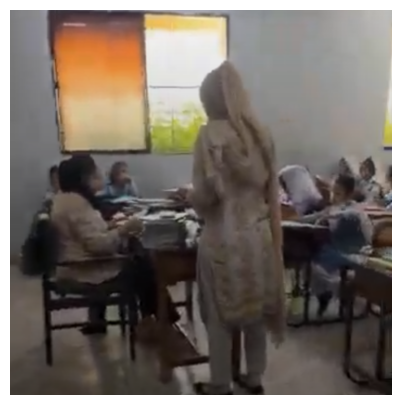

Predictions for 00006.png:
  - teacher checking notebook: 0.5046
  - teacher using mobile: 0.4683
  - students getting punished: 0.0269
  - students fighting: 0.0002


Time taken for 00002.png: 0.1313 seconds


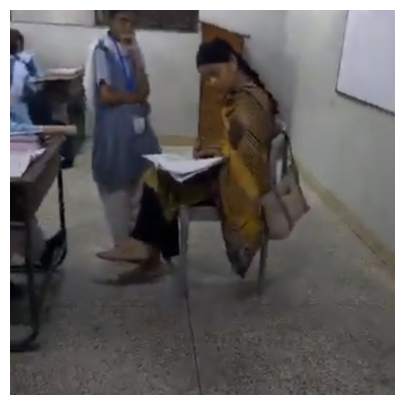

Predictions for 00002.png:
  - teacher checking notebook: 0.8111
  - teacher using mobile: 0.1852
  - students getting punished: 0.0037
  - students fighting: 0.0000


Time taken for 00001.png: 0.1291 seconds


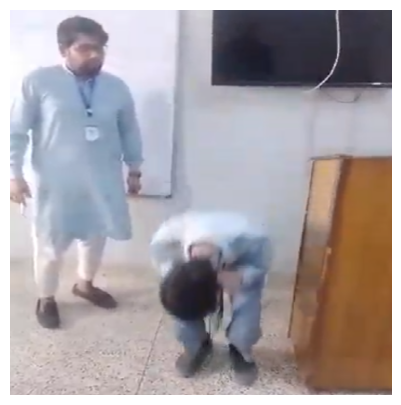

Predictions for 00001.png:
  - students getting punished: 0.9088
  - teacher checking notebook: 0.0743
  - teacher using mobile: 0.0143
  - students fighting: 0.0026


Time taken for 00005.png: 0.1224 seconds


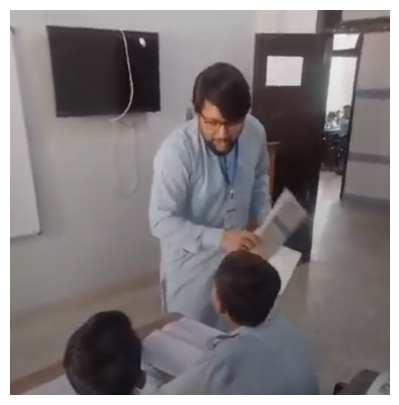

Predictions for 00005.png:
  - teacher checking notebook: 0.9042
  - teacher using mobile: 0.0885
  - students getting punished: 0.0070
  - students fighting: 0.0003


In [ ]:
for image_name in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_name)
    if image_name.lower().endswith(('png')):
        try:
            image = Image.open(image_path)

            start_time = time.time()
            predictions = detector(image, candidate_labels=candidate_labels)
            time_taken = time.time() - start_time
            print(f"\n\nTime taken for {image_name}: {time_taken:.4f} seconds")

            plt.figure(figsize=(5, 5))
            plt.imshow(image)
            plt.axis('off')
            plt.show()

            print(f"Predictions for {image_name}:")
            for pred in predictions:
                print(f"  - {pred['label']}: {pred['score']:.4f}")



        except Exception as e:
            print(f"Error processing {image_name}: {e}")